### 목표 : 미니배치기반 기계학습 진행 실습
- 확률적 경사하강법 기반의 알고리즘 적용 모델
- 데이터의 처음부터 끝까지 (에포크) 학습 후 가중치(W)와 절편(b) 업데이트 하는 방식에서 에포크를 미니배치 크기만큼 나누어서 학습 후 가중치(W)와 절편(b) 업데이트 진행함
- 장점
    * 온라인 학습 즉, 점진적 학습 가능 => partial_fit( ) : 기존 모델에 추가로 1에포크 학습
    * 기존의 다른 모델보다 속도 빠르다는 장점 => 랜덤으로 1개 데이터 추출 후 학습 진행
    * 조기 학습 중단 설정 가능
- 단점
    * 전체 학습보다 정확도는 떨어질 수 있음!

[1] 모듈 로딩 및 데이터 준비 <hr>

In [1094]:
# 모듈 로딩
import pandas as pd

data = '../data/fish.csv'

In [1095]:
# 데이터 로딩
fishDF = pd.read_csv(data)
fishDF

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


[2] 데이터 전처리 => 학습을 위한 가공 <hr>

In [1096]:
# 전처리는 생략

[2-1] 피처/타겟 분리

In [1097]:
featureDF = fishDF[fishDF.columns[1:]]
targetDF = fishDF['Species']

print(f"피처 => {featureDF.shape}, 타겟 => {targetDF.shape}")

피처 => (159, 5), 타겟 => (159,)


[2-2] 학습/테스트용 데이터셋 분리

In [1098]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(featureDF, targetDF, stratify = targetDF, random_state = 41)

In [1099]:
print(f"[학습용] X_train => {X_train.shape}   y_train => {y_train.shape}")
print(f"[테스트용] X_test => {X_test.shape}    y_test => {y_test.shape}")

[학습용] X_train => (119, 5)   y_train => (119,)
[테스트용] X_test => (40, 5)    y_test => (40,)


[2-3] 피처 => 스케일링

In [1100]:
from sklearn.preprocessing import StandardScaler

sdScaler = StandardScaler()
sdScaler.fit(X_train)

StandardScaler()

In [1101]:
# 훈련용 데이터셋 스케일링
scaled_X_train = sdScaler.transform(X_train)

# 테스트용 데이터셋 스케일링
scaled_X_test = sdScaler.transform(X_test)

[3] 학습 진행 <hr>
- 학습 방법 : 확률적 경사하강법 (SGD) 기반의 분류

In [1102]:
# 모델 인스턴스 생성
from sklearn.linear_model import SGDClassifier

# model1 = SGDClassifier()
# model1 = SGDClassifier(random_state = 41)
# model1 = SGDClassifier(random_state = 41, verbose = 0)
# model1 = SGDClassifier(random_state = 41, verbose = 0, loss = 'log_loss')
# model1 = SGDClassifier(random_state = 41, verbose = 0, loss = 'log_loss', n_iter_no_change=1000)
model1 = SGDClassifier(random_state = 41, verbose = 0, loss = 'log_loss', alpha = 0.1)  
#l2의 강도를 조절하는 것이 alpha이다. 0에 가까울수록 가중치를 ▼ => 그렇다고 해서 train score, test score 이 막 바로 오르거나 이러지는 않음!!!
# 그래서 알파 값을 조절해서 (즉 규제를 한다는 거긔) 적당한 train score, test score 결과를 찾아야 한다.

model1.fit(scaled_X_train, y_train)

SGDClassifier(alpha=0.1, loss='log_loss', random_state=41)

In [1103]:
train_score1 = model1.score(scaled_X_train, y_train)
test_score1 = model1.score(scaled_X_test, y_test)

print(f"[기본 SGD] 학습 점수 : {train_score1}, 테스트 점수 : {test_score1}")

[기본 SGD] 학습 점수 : 0.6974789915966386, 테스트 점수 : 0.725


In [1104]:
# 학습 후 설정된 파라미터 즉 모델 파라미터
print(f"n_iter_ : {model1.n_iter_}")

# 기본이 1000번인데 이 모델이 알아서 34번까지만 학습함

n_iter_ : 14


- 1 에포크 씩 점진적으로 학습 진행 => partial_fit()

In [1105]:
# 모뎅 인스턴스 생성
model2 = SGDClassifier(loss = 'log_loss')
model2.partial_fit(scaled_X_train, y_train, classes = y_train.unique())     #여기서는 classes 설정이 필수이다.

SGDClassifier(loss='log_loss')

In [1106]:
train_score2 = model2.score(scaled_X_train, y_train)
test_score2 = model2.score(scaled_X_test, y_test)

In [1107]:
print(f"[기본 SGD] 학습 점수 : {train_score2}, 테스트 점수 : {test_score2}")

[기본 SGD] 학습 점수 : 0.6218487394957983, 테스트 점수 : 0.475


In [1108]:
train_score , test_score = [], []

for n in range(1, 100):
    model2.partial_fit(scaled_X_train, y_train, classes = y_train.unique())
    train_score2 = model2.score(scaled_X_train, y_train)
    test_score2 = model2.score(scaled_X_test, y_test)   
    print(f"[{n}번 학습] [기본 SGD] 학습 점수 : {train_score2}, 테스트 점수 : {test_score2}")
    train_score.append(train_score2)
    test_score.append(test_score2)
    
    # if abs(test_score2 - train_score2) >= 0.03 :
    #     # 차이의 절대값이 설정한 값 (0.03) 이 넘으면 카운트하지 않겠다.
    #     # 그럼 그 차이가 그정도 되면 학습의 반복을 하지 않고 학습을 종료함
    #     break
    
    # if (test_score2 >= 0.9) and (abs(test_score2 - train_score2) >= 0.03 ) :
    #     # 이렇게도 설정할 수 있다.
    #     break
        
# 이때까지는 처음부터 했는데
# partianl은 다르다. 부분 진행하고 그다음 부분 진행한다.

[1번 학습] [기본 SGD] 학습 점수 : 0.6470588235294118, 테스트 점수 : 0.65
[2번 학습] [기본 SGD] 학습 점수 : 0.8067226890756303, 테스트 점수 : 0.8
[3번 학습] [기본 SGD] 학습 점수 : 0.8403361344537815, 테스트 점수 : 0.825
[4번 학습] [기본 SGD] 학습 점수 : 0.8067226890756303, 테스트 점수 : 0.775
[5번 학습] [기본 SGD] 학습 점수 : 0.7058823529411765, 테스트 점수 : 0.675
[6번 학습] [기본 SGD] 학습 점수 : 0.7142857142857143, 테스트 점수 : 0.675
[7번 학습] [기본 SGD] 학습 점수 : 0.6722689075630253, 테스트 점수 : 0.625
[8번 학습] [기본 SGD] 학습 점수 : 0.8571428571428571, 테스트 점수 : 0.75
[9번 학습] [기본 SGD] 학습 점수 : 0.8571428571428571, 테스트 점수 : 0.825
[10번 학습] [기본 SGD] 학습 점수 : 0.7647058823529411, 테스트 점수 : 0.725
[11번 학습] [기본 SGD] 학습 점수 : 0.7899159663865546, 테스트 점수 : 0.8
[12번 학습] [기본 SGD] 학습 점수 : 0.8403361344537815, 테스트 점수 : 0.85
[13번 학습] [기본 SGD] 학습 점수 : 0.865546218487395, 테스트 점수 : 0.8
[14번 학습] [기본 SGD] 학습 점수 : 0.8067226890756303, 테스트 점수 : 0.8
[15번 학습] [기본 SGD] 학습 점수 : 0.8487394957983193, 테스트 점수 : 0.825
[16번 학습] [기본 SGD] 학습 점수 : 0.8235294117647058, 테스트 점수 : 0.775
[17번 학습] [기본 SGD] 학습 점수 : 0.6050420168067226,

In [1109]:
print(train_score.index(max(train_score)))

82


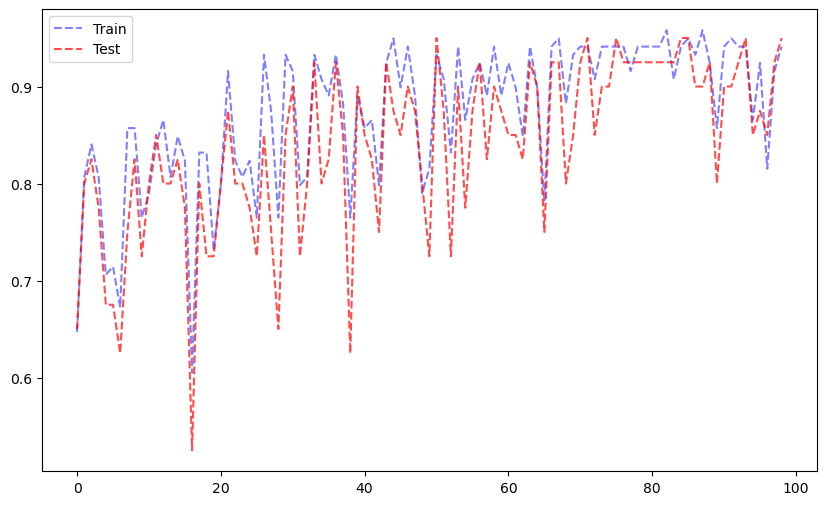

In [1110]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(train_score, 'b--', label = 'Train', alpha = 0.5)
plt.plot(test_score, 'r--', label = 'Test', alpha = 0.7)
plt.legend()
plt.show()

# test score가 가장 높은 것을 봐야한다.